<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('../__ipython_notebook_toc.js')

# Utility

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
%matplotlib inline

def overview(path):
    df = pd.read_csv(path, header=0, index_col=0);
    df.index = [x for x in range(len(df))]
    print(df.head())
    print('Class 0 : %d' % len(df['movement'] == 0))
    print('Class 1 : %d' % len(df['movement'] == 1))
    plt.plot(df.index, df.t)
    return df

def split_and_train(df, test, c, random, threshold):
    X = df.drop(['t','movement'], axis=1)
    y = df['movement']
    
    # Split the dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    
    # Train the model
    model = LogisticRegression(C=c, solver = 'liblinear')
    model.fit(X_train, y_train)
    
    print('The learned weights are {} {}'.format(model.intercept_, model.coef_)) 

    preds = model.predict_proba(X_train) # Predict on our training set.
    print('The classification accuracy for train set: {}'.format((((preds[:,1] > threshold) == y_train).mean())))

    preds = model.predict_proba(X_test) # Predict on our test set.
    print('The classification accuracy for test set: {}'.format((((preds[:,1] > threshold) == y_test).mean())))
    
    return model, y_test.to_numpy(), preds[:,1]

def show_roc(label, prob):
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(label, prob)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    # calculate roc auc
    roc_auc = roc_auc_score(label, prob)
    plt.title('ROC AUC Curve')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.show()
    print('ROC AUC : %.3f' % roc_auc)


def show_pr(label, prob):
    # plot no skill precision-recall curve
    no_skill = len(label[label==1]) / len(label)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate precision-recall curve for model
    precision, recall, _ = precision_recall_curve(label, prob, pos_label=1)
    # plot model precision-recall curve
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.title('PR AUC Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    # calculate roc auc
    auc_score = auc(recall, precision)
    print('PR AUC : %.3f' % auc_score)
    
def show_cm(label, prob, threshold, names): # Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(label, prob > threshold)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()
    
def show_f1(label, prob, threshold):
    score = f1_score(label, prob > threshold)
    print('F1 Score : %.3f' % score)
    
def build(df, test, C, random, threshold):
    model, label, prob = split_and_train(df, test, C, random, threshold)
    show_roc(label, prob)
    show_pr(label, prob)
    show_cm(label, prob, threshold, [0, 1])
    show_f1(label, prob, threshold)
    
threshold = 0.45

# Daily lag(1) without volume

      t-1       t  movement
0  103.50  100.58         0
1  100.58  100.59         1
2  100.59  102.01         1
3  102.01  105.93         1
4  105.93  106.04         1
Class 0 : 721
Class 1 : 721


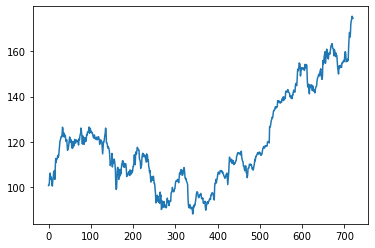

In [2]:
df = overview("../data_preprocess/df_day_1_1.csv")

The learned weights are [9.02789593e-06] [[0.00110667]]
The classification accuracy for train set: 0.5333333333333333
The classification accuracy for test set: 0.5027624309392266


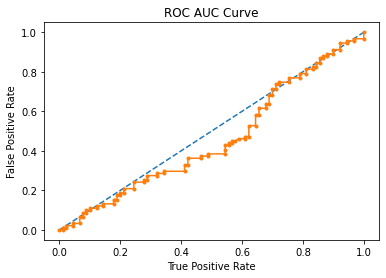

ROC AUC : 0.459


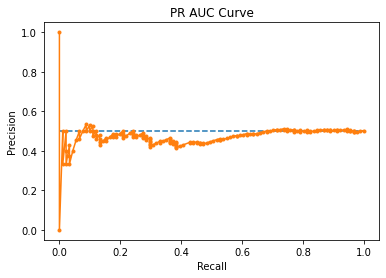

PR AUC : 0.472


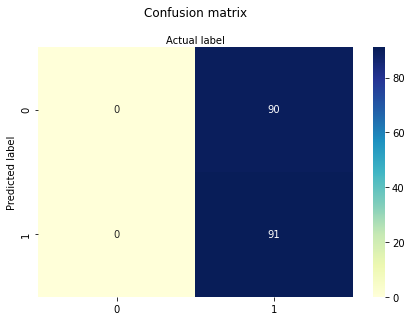

F1 Score : 0.669


In [3]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Daily lag(1) with volume

In [ ]:
df = overview("../data_preprocess/df_day_1_1_v.csv")

In [ ]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Daily lag(5) without volume

      t-5     t-4     t-3     t-2     t-1       t  movement
0  103.50  100.58  100.59  102.01  105.93  106.04         1
1  100.58  100.59  102.01  105.93  106.04  103.42         0
2  100.59  102.01  105.93  106.04  103.42  104.35         1
3  102.01  105.93  106.04  103.42  104.35  103.95         0
4  105.93  106.04  103.42  104.35  103.95  101.12         0
Class 0 : 717
Class 1 : 717


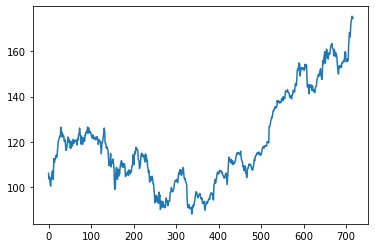

In [4]:
df = overview("../data_preprocess/df_day_5_1.csv")

The learned weights are [0.58573632] [[-0.02401162  0.01333423 -0.05889248  0.0402226   0.02523529]]
The classification accuracy for train set: 0.5307262569832403
The classification accuracy for test set: 0.5277777777777778


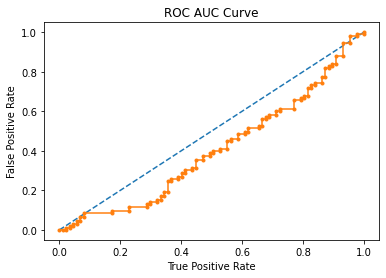

ROC AUC : 0.405


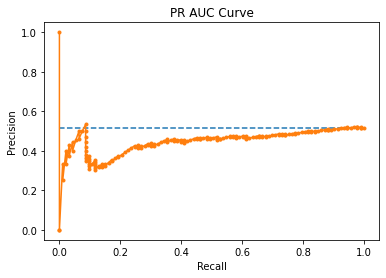

PR AUC : 0.449


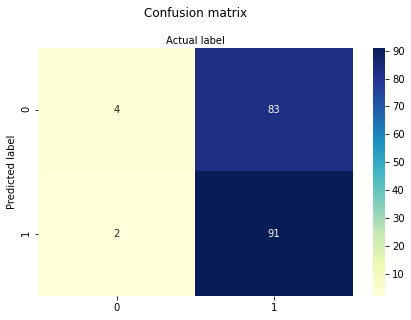

F1 Score : 0.682


In [5]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Daily lag(5) with volume

In [ ]:
df = overview("../data_preprocess/df_day_5_1_v.csv")

In [ ]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Weekly lag(1) without volume

       t-1        t  movement
0  102.522  103.776         1
1  103.776  104.058         1
2  104.058  108.602         1
3  108.602  112.960         1
4  112.960  117.872         1
Class 0 : 144
Class 1 : 144


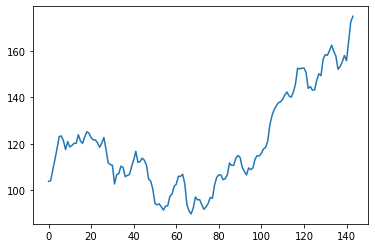

In [6]:
df = overview("../data_preprocess/df_week_1_1.csv")

The learned weights are [-0.18435454] [[0.00438577]]
The classification accuracy for train set: 0.5833333333333334
The classification accuracy for test set: 0.6111111111111112


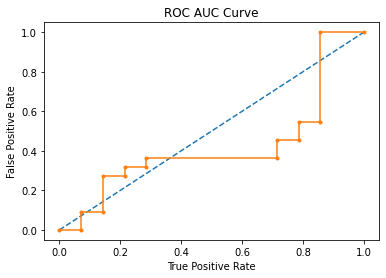

ROC AUC : 0.419


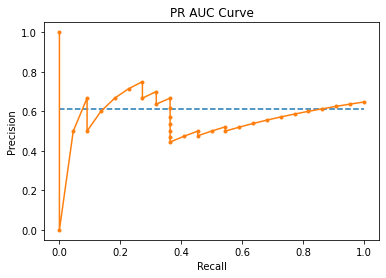

PR AUC : 0.570


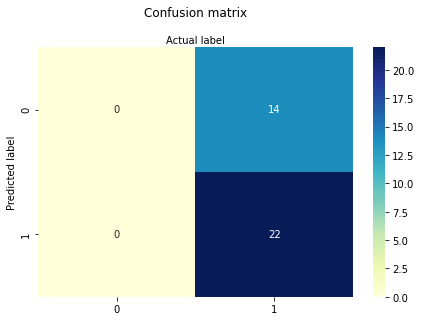

F1 Score : 0.759


In [7]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Weekly lag(1) with volume

In [ ]:
df = overview("../data_preprocess/df_week_1_1_v.csv")

In [ ]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Weekly lag(5) without volume

       t-5      t-4      t-3      t-2      t-1        t  movement
0  102.522  103.776  104.058  108.602  112.960  117.872         1
1  103.776  104.058  108.602  112.960  117.872  123.068         1
2  104.058  108.602  112.960  117.872  123.068  123.334         1
3  108.602  112.960  117.872  123.068  123.334  121.276         0
4  112.960  117.872  123.068  123.334  121.276  117.496         0
Class 0 : 140
Class 1 : 140


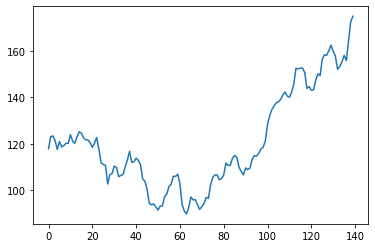

In [8]:
df = overview("../data_preprocess/df_week_5_1.csv")

The learned weights are [0.00227769] [[-0.04649915  0.06812731  0.00506047 -0.12810097  0.1029702 ]]
The classification accuracy for train set: 0.5619047619047619
The classification accuracy for test set: 0.6571428571428571


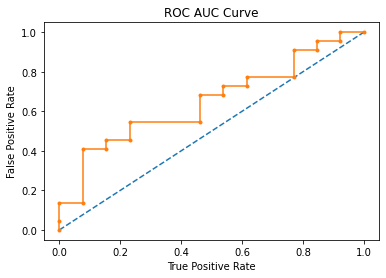

ROC AUC : 0.650


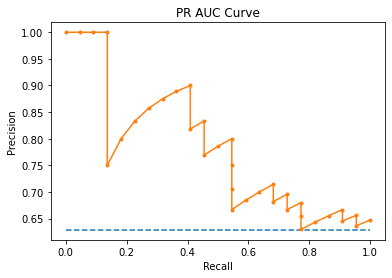

PR AUC : 0.780


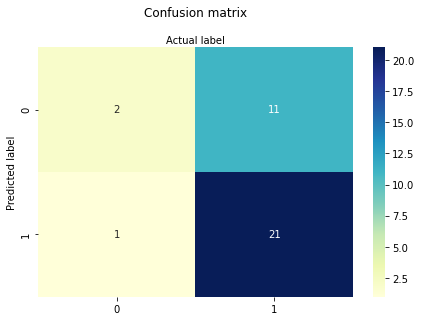

F1 Score : 0.778


In [9]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Weekly lag(5) with volume

In [ ]:
df = overview("../data_preprocess/df_week_5_1_v.csv")

In [ ]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Monthly lag(1) without volume

        t-1         t  movement
0  104.7395  119.3085         1
1  119.3085  119.5695         1
2  119.5695  120.8705         1
3  120.8705  122.3340         1
4  122.3340  122.6090         1
Class 0 : 36
Class 1 : 36


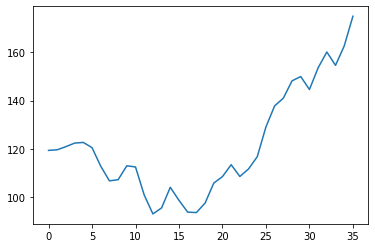

In [10]:
df = overview("../data_preprocess/df_month_1_1.csv")

The learned weights are [0.65719907] [[0.00498502]]
The classification accuracy for train set: 0.7777777777777778
The classification accuracy for test set: 0.3333333333333333


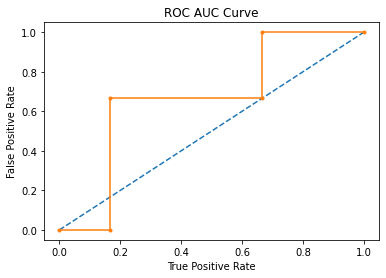

ROC AUC : 0.667


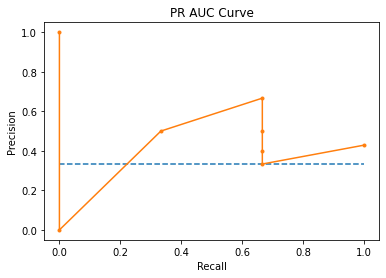

PR AUC : 0.405


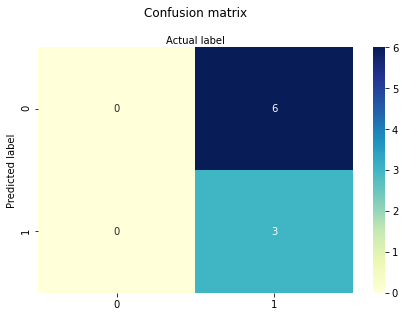

F1 Score : 0.500


In [11]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Monthly lag(1) with volume

In [ ]:
df = overview("../data_preprocess/df_month_1_1_v.csv")

In [ ]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Monthly lag(5) without volume

        t-5       t-4       t-3       t-2        t-1          t  movement
0  104.7395  119.3085  119.5695  120.8705  122.33400  122.60900         1
1  119.3085  119.5695  120.8705  122.3340  122.60900  120.45000         0
2  119.5695  120.8705  122.3340  122.6090  120.45000  112.75750         0
3  120.8705  122.3340  122.6090  120.4500  112.75750  106.67835         0
4  122.3340  122.6090  120.4500  112.7575  106.67835  107.14650         1
Class 0 : 32
Class 1 : 32


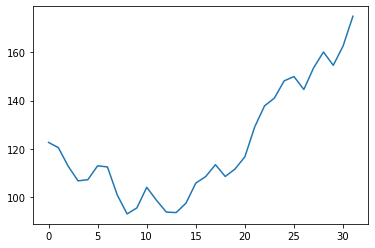

In [12]:
df = overview("../data_preprocess/df_month_5_1.csv")

The learned weights are [-2.24932528] [[-0.15948362  0.16345997  0.07869432 -0.1482067   0.08860586]]
The classification accuracy for train set: 0.6666666666666666
The classification accuracy for test set: 0.625


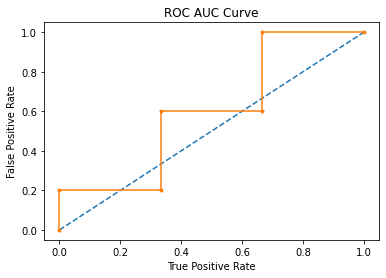

ROC AUC : 0.600


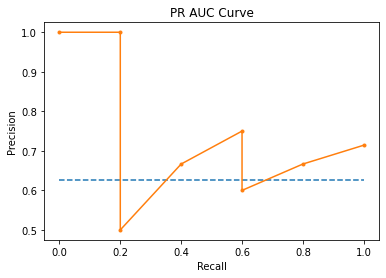

PR AUC : 0.723


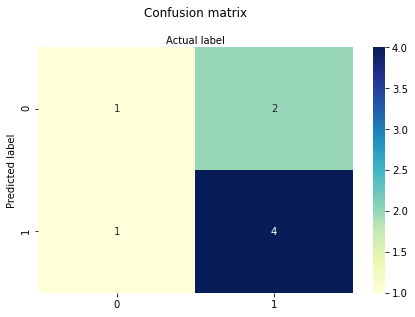

F1 Score : 0.727


In [13]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Monthly lag(5) with volume

In [ ]:
df = overview("../data_preprocess/df_month_5_1_v.csv")

In [ ]:
build(df, test=0.25, C=1e5, random=0, threshold=threshold)

# Probably without data snooping?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
%matplotlib inline

def split_and_train(path_train, path_test, test, c, random, threshold):
    df_train = pd.read_csv(path_train, header=0)
    df_test = pd.read_csv(path_test, header=0);
    
    X_train = df_train.drop(['t','movement'], axis=1)
    X_test = df_test.drop(['t','movement'], axis=1)
    y_train = df_train['movement']
    y_test = df_test['movement']
    
    # Train the model
    model = LogisticRegression(C=c, solver = 'liblinear')
    model.fit(X_train, y_train)
    
    print('The learned weights are {} {}'.format(model.intercept_, model.coef_)) 

    preds = model.predict_proba(X_train) # Predict on our training set.
    print('The classification accuracy for train set: {}'.format((((preds[:,1] > threshold) == y_train).mean())))

    preds = model.predict_proba(X_test) # Predict on our test set.
    print('The classification accuracy for test set: {}'.format((((preds[:,1] > threshold) == y_test).mean())))
    
    return model, y_test.to_numpy(), preds[:,1]

def show_roc(label, prob):
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(label, prob)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    # calculate roc auc
    roc_auc = roc_auc_score(label, prob)
    plt.title('ROC AUC Curve')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.show()
    print('ROC AUC : %.3f' % roc_auc)


def show_pr(label, prob):
    # plot no skill precision-recall curve
    no_skill = len(label[label==1]) / len(label)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate precision-recall curve for model
    precision, recall, _ = precision_recall_curve(label, prob, pos_label=1)
    # plot model precision-recall curve
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.title('PR AUC Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    # calculate roc auc
    auc_score = auc(recall, precision)
    print('PR AUC : %.3f' % auc_score)
    
def show_cm(label, prob, threshold, names): # Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(label, prob > threshold)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()
    
def show_f1(label, prob, threshold):
    score = f1_score(label, prob > threshold)
    print('F1 Score : %.3f' % score)
    
def build(path_train, path_test, test, C, random, threshold):
    model, label, prob = split_and_train(path_train, path_test, test, C, random, threshold)
    show_roc(label, prob)
    show_pr(label, prob)
    show_cm(label, prob, threshold, [0, 1])
    show_f1(label, prob, threshold)

# Daily lag(1) without volume

In [ ]:
build("../data_preprocess/train df_day_1_1.csv", "../data_preprocess/testdf_day_1_1.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(1) with volume

In [ ]:
build("../data_preprocess/train df_day_1_1_v.csv", "../data_preprocess/testdf_day_1_1_v.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(5) without volume

In [ ]:
build("../data_preprocess/train df_day_5_1.csv", "../data_preprocess/testdf_day_5_1.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(5) with volume

In [ ]:
build("../data_preprocess/train df_day_5_1_v.csv", "../data_preprocess/testdf_day_5_1_v.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Extras

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from scipy.special import expit
from matplotlib import gridspec

from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# generate df with given lags
def generate_data(df, col, lag):
    new_df = df.loc[:]
    for i in range(1,lag+1):
        col_name = col + '-' + str(i)
        new_df[col_name] = df[col].shift(-i)
        new_df = new_df.dropna()
        
    return new_df

df = pd.read_csv('../data_preprocess_v3/aapl.us.csv', header=0, index_col=0)
df.index = [i for i in range(len(df.index))]
df = df[df.index >= 5000]
df.index = [i for i in range(len(df.index))]
df = df[['Close']]

# generate lags
df = generate_data(df, 'Close', 2)

# convert to movement
df['label'] = np.where(df['Close'] > df['Close-1'], 1, 0)

df.dropna()
df.head()

,Close,Close-1,Close-2,label
0,1.9465,1.9301,1.9236,1
1,1.9301,1.9236,1.8658,1
2,1.9236,1.8658,1.8708,1
3,1.8658,1.8708,1.8941,0
4,1.8708,1.8941,2.1078,0


In [15]:
tmp_1 = df[df['label'] == 1]
tmp_1 = tmp_1[['Close-1', 'Close-2']]
tmp_0 = df[df['label'] == 0]
tmp_0 = tmp_0[['Close-1', 'Close-2']]
tmp_1.index = [i for i in range(len(tmp_1.index))]
tmp_0.index = [i for i in range(len(tmp_0.index))]

tmp_1.head()

,Close-1,Close-2
0,1.9301,1.9236
1,1.9236,1.8658
2,1.8658,1.8708
3,2.0618,2.0462
4,2.0462,2.0618


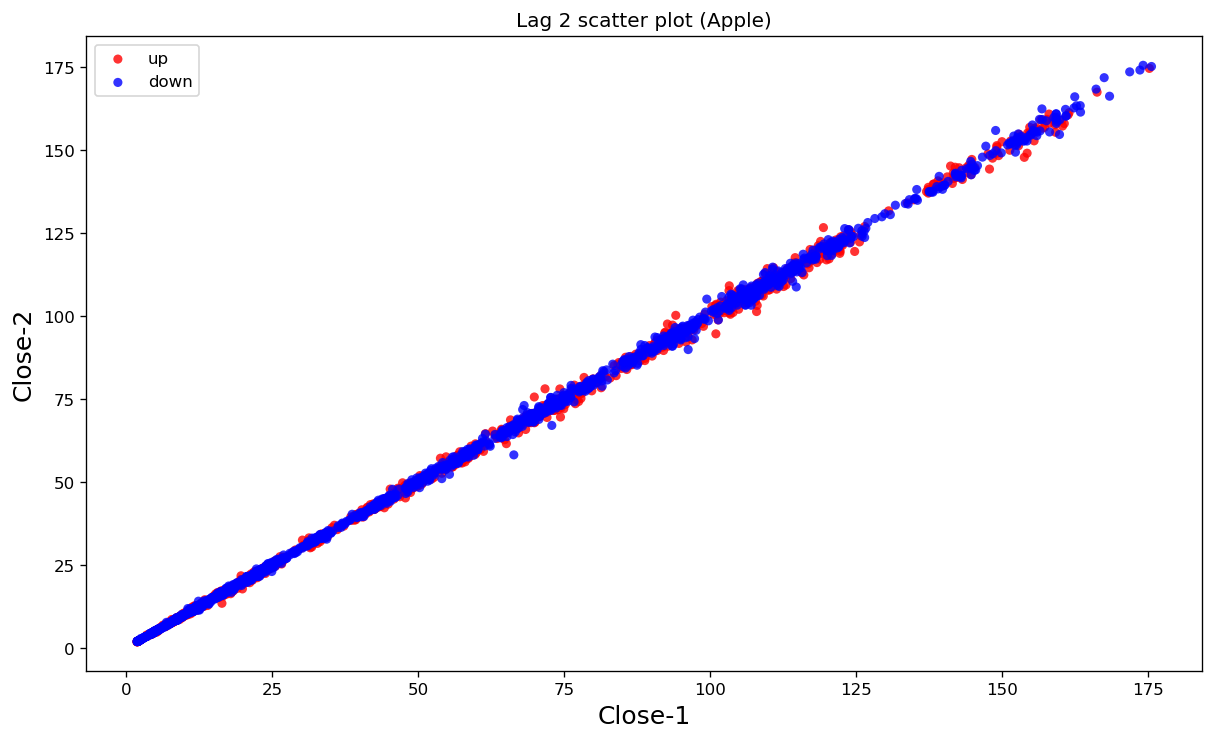

In [16]:
# 2D scatter plot

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

tmp_1 = df[df['label'] == 1]
tmp_0 = df[df['label'] == 0]

tmp_1 = (tmp_1['Close-1'], tmp_1['Close-2'])
tmp_0 = (tmp_0['Close-1'], tmp_0['Close-2'])
data = (tmp_1, tmp_0)
colors = ("red", "blue")
groups = ("up", "down")

# Create plot
for data, color, group in zip(data, colors, groups):
    x, y = data
    plt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
label_font_size = 15
plt.title('Lag 2 scatter plot (Apple)')
plt.ylabel('Close-2', fontsize=label_font_size)
plt.xlabel('Close-1', fontsize=label_font_size)
plt.legend(loc=2)
plt.show()

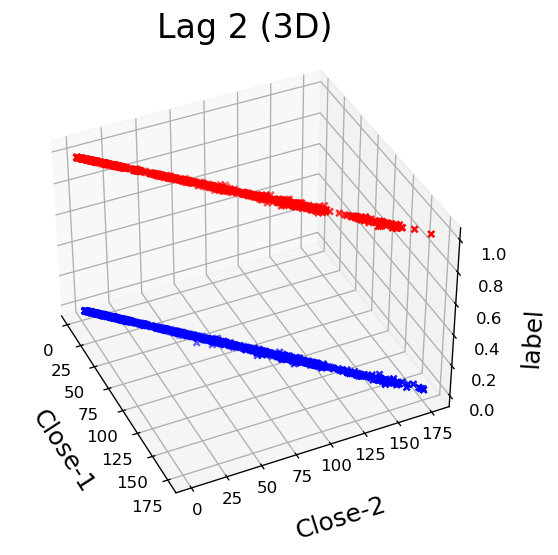

In [17]:
# 3D scatter plot

df = df[['Close-1', 'Close-2', 'label']]

#) Meshgrid for regression curve: 
def pred_3d_curve(X,w,b):   # predicts y-values for regression curve spanned by n0s and n1s (see below)
        p=expit(X @ w.T + b)
        return p

# Meshgrid for plots of costs: 
def CrossEntropy_cost(x,y,w,b):  # (same as for simple logistic regression!)
        p=expit(x @ w.T + b)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))
    
n0s = np.linspace(-13, 13, 35) 
n1s = np.linspace(-13, 13, 35)
N1, N2 = np.meshgrid(n0s, n1s) # create meshgrid for regression curve

# Create plot:
fig = plt.figure(figsize=(8,10)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1.3, 1]) # set height ratio of subplots

# Customize subplots: 
title_font_size = 20 # size of title fonts
label_font_size = 15 # size of label fonts
tick_label_size= 10 # size of tick labels
ax0=fig.add_subplot(gs[0], projection="3d")
ax0.set_title("Lag 2 (3D)", fontsize=title_font_size)
ax0.view_init(elev=38., azim=-25)
ax0.set_xlabel('Close-1', fontsize=label_font_size, labelpad=8)
ax0.set_ylabel('Close-2', fontsize=label_font_size, labelpad=7)
ax0.set_zlabel('label', fontsize=label_font_size, labelpad=6)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.tick_params(axis='x', pad=3, which='major', labelsize=tick_label_size)
ax0.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size)

# for i in range(0, len(tmp_1[0])+1) :
#     ax0.scatter(tmp_1[0][i], tmp_1[1][i], 1, marker="x", s=14, color="red")

# for i in range(0, len(tmp_0[0])+1) :
#     ax0.scatter(tmp_0[0][i], tmp_0[1][i], 0, marker="x", s=14, color="blue")

ax0.scatter(tmp_1[0], tmp_1[1], np.ones(len(tmp_1[0])), marker="x", s=14, color="red")
ax0.scatter(tmp_0[0], tmp_0[1], np.zeros(len(tmp_0[0])), marker="x", s=14, color="blue")

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-20-755f3410f142>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Close-1'] = np.array(x[['Close-1']]) * np.array(e)
<ipython-input-20-755f3410f142>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Close-2'] = np.array(x[['Close-2']]) * np.ar

w0 :  [0.1        0.09715221 0.09430677 ... 0.00616341 0.00616341 0.00616341]
w1 :  [0.1        0.09714774 0.09429782 ... 0.00602073 0.00602073 0.00602073]
c :  [1792.09485488 1782.65032567 1809.53499846 ...  840.5         840.5
  840.5       ]
cl :  [[0.99474664 0.99471293 0.99468509 ... 1.         1.         1.        ]
 [0.90605408 0.90605581 0.90605726 ... 1.         1.         0.90622136]
 [0.76242482 0.76242448 0.7624242  ... 1.         1.         0.76239233]
 ...
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950]


MovieWriter Pillow unavailable; using Pillow instead.


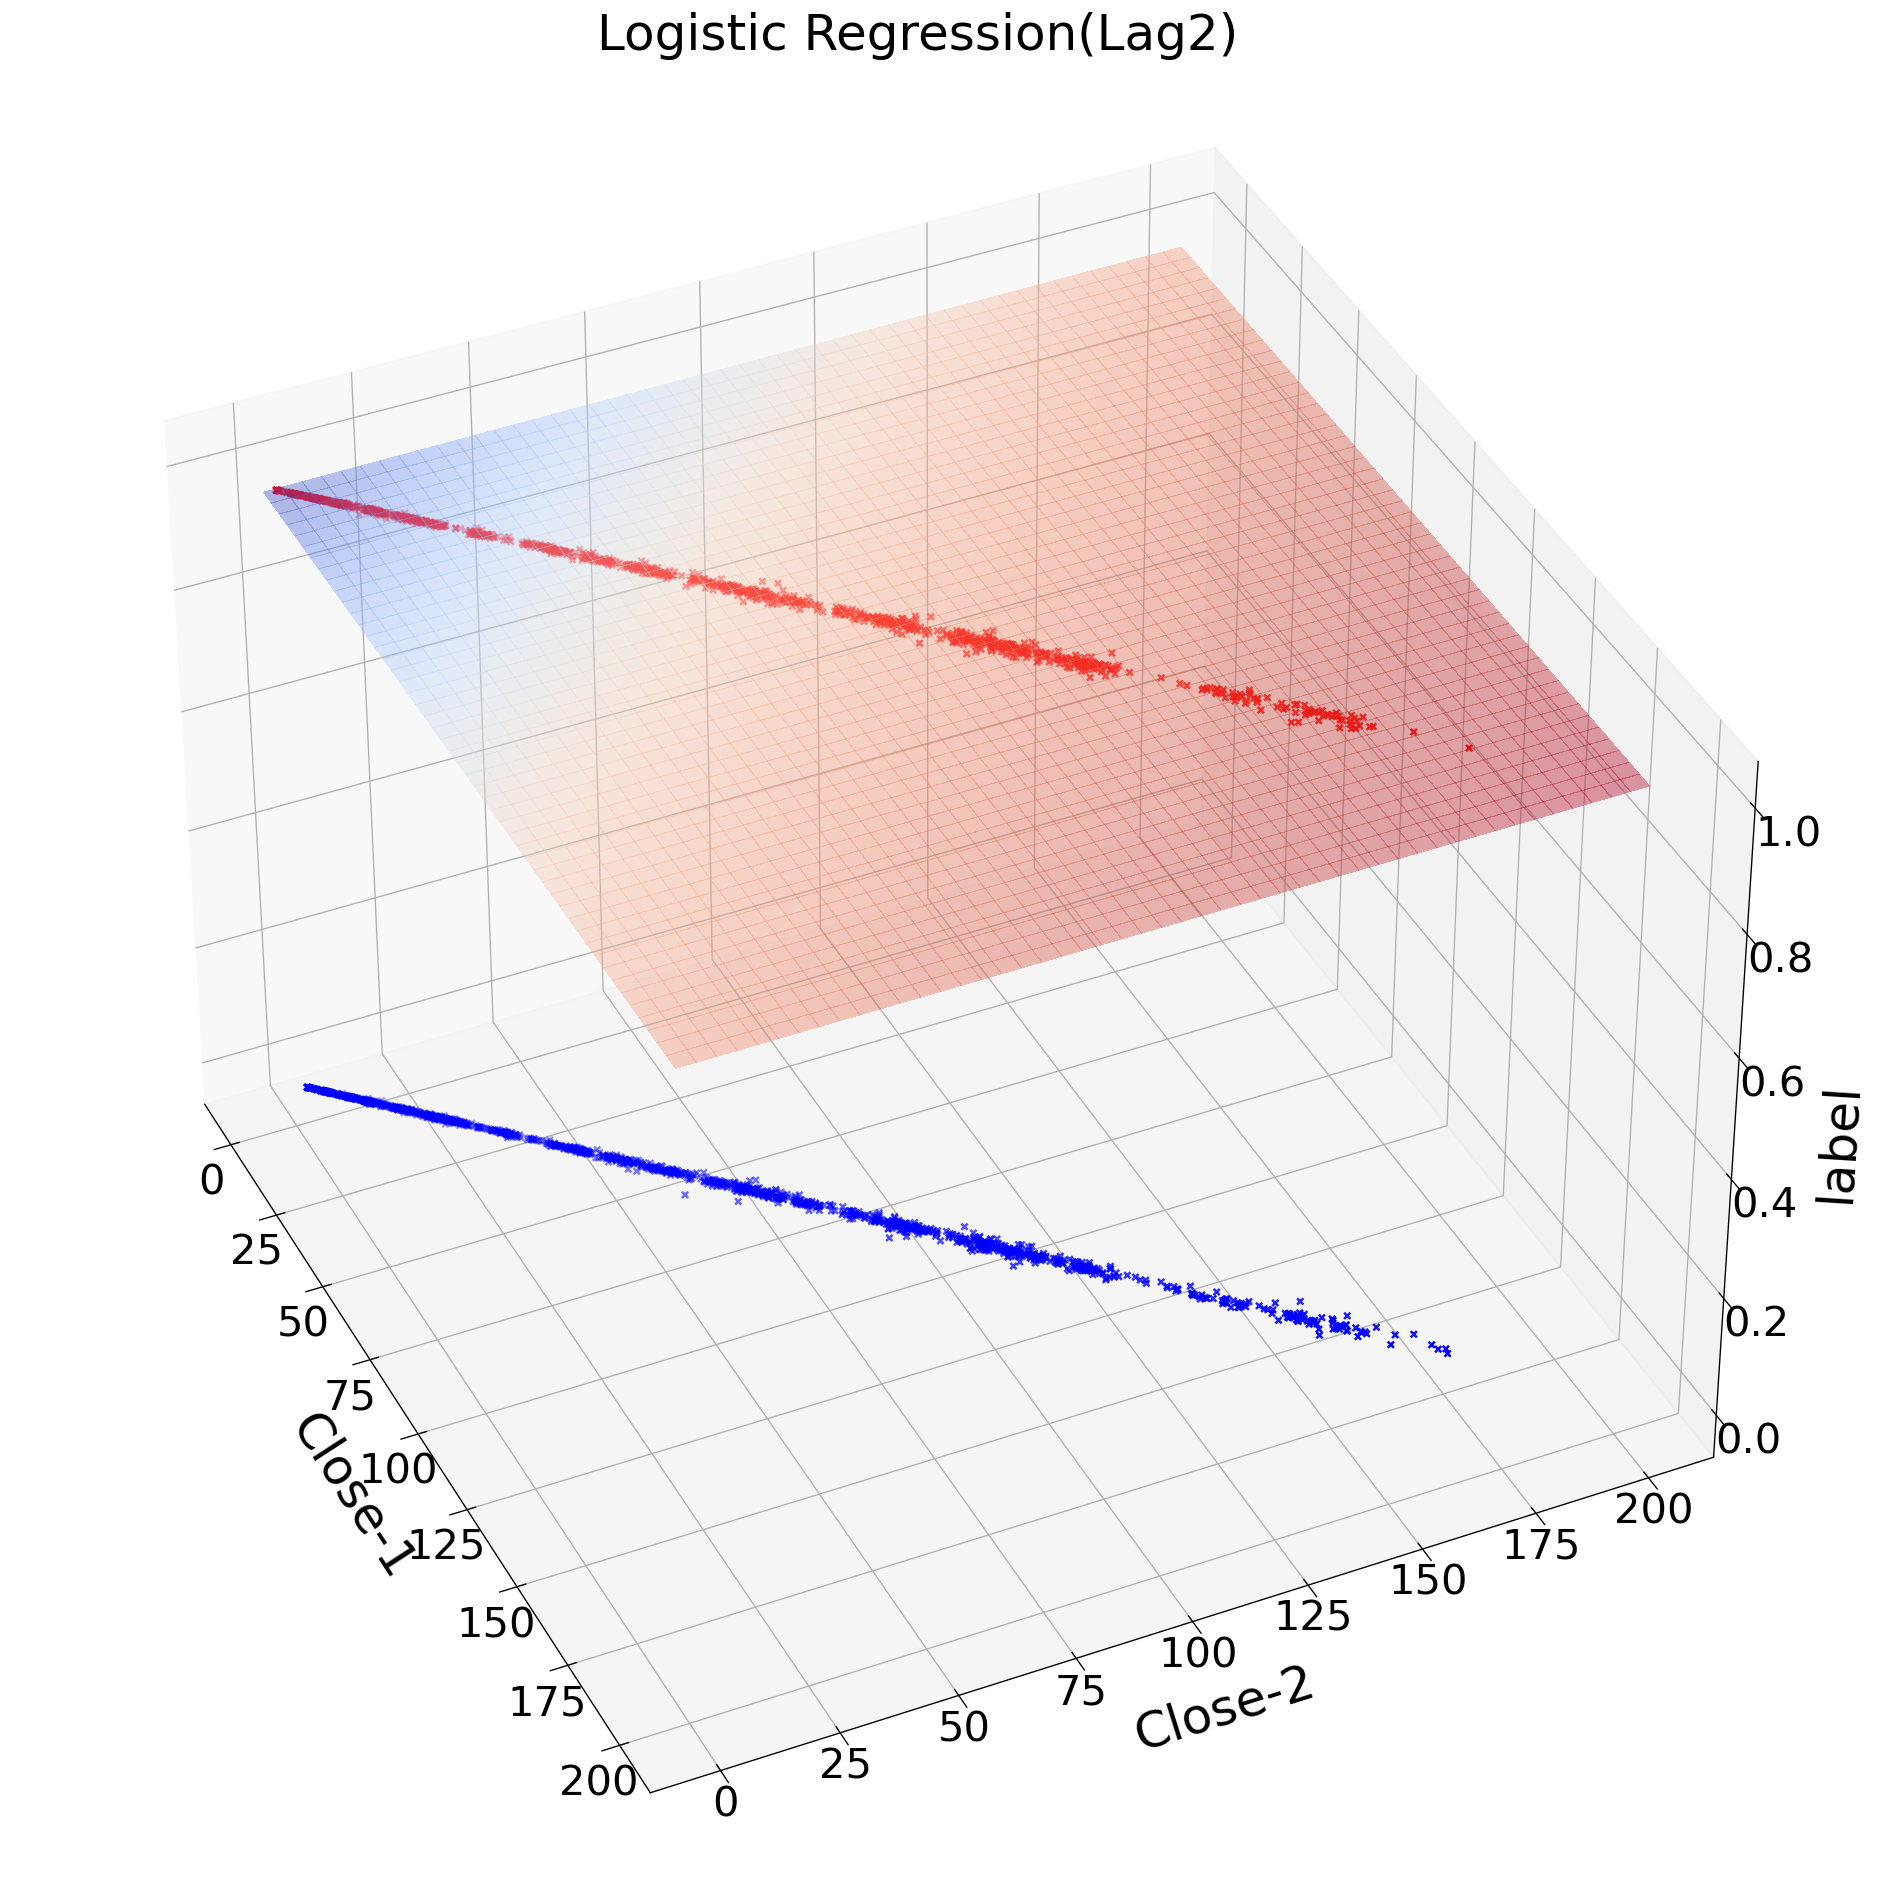

In [20]:
X_train = df[['Close-1', 'Close-2']]
y_train = pd.DataFrame(df[['label']].values, dtype=float)

model=LogisticRegression()
model.fit(X_train, y_train)

bias = float(model.intercept_ + 5) # set b to the y-intercept value the previous model returned 
# + 20 for -0.1 weights
model_epochs = 2000

def predict(x,w,b):
    p = expit(x @ w.T + b)
    return p

def cost(x, y, w, b):
    p = predict(x, w, b)
    return np.sum(np.abs(p - y) * np.abs(p - y))

def step(x, y, w, b, lr):
    p = predict(x, w, b)
    e = p - y
    x['Close-1'] = np.array(x[['Close-1']]) * np.array(e)
    x['Close-2'] = np.array(x[['Close-2']]) * np.array(e)
    dw = np.mean(x, axis=0)
    return w - np.array(dw * lr).reshape(1,2), b - b * np.mean(e).values
    

def fit(x, y, epoch_=1000000):
    model_AllWeights = np.zeros((epoch_, x.shape[1]))
    model_AllBiases = np.zeros(epoch_)
    model_AllCosts = np.zeros(epoch_)
    model_All_cl = np.zeros((epoch_, len(x)))
    
    model_lr = 0.0001 # learning rate default 0.01
    model_n = x.shape[1]
    model_w = np.array([[0.1, 0.1]]) # init weights
    model_b = np.array([[bias]]) # fixed value for b

    for steps in range(epoch_):
        model_AllWeights[steps] = model_w
        model_AllCosts[steps] = cost(x, y, model_w, model_b)
        model_All_cl[steps] = predict(x, model_w, model_b).T # predicted y-values for connection lines
        model_w, model_b = step(x, y, model_w, model_b, model_lr)
        
    return model_AllWeights, model_AllBiases, model_AllCosts, model_All_cl

# Set y-intercept value and train fixed-intercept logistic regression model:

model_AllWeights, model_AllBiases, model_AllCosts, model_All_cl = fit(X_train, y_train, epoch_=model_epochs)

# Stored parameter values of fixed-intercept logistic regression model: 
w0 = model_AllWeights.T[0]
w1 = model_AllWeights.T[1]
c = model_AllCosts
cl = model_All_cl

print('w0 : ', w0)
print('w1 : ', w1)
print('c : ', c)
print('cl : ', cl)

# Meshgrid for regression curve: 
def pred_3d_curve(X,w,b):   # predicts y-values for regression curve spanned by n0s and n1s (see below)
        p = expit(X @ w.T + b)
        return p
    
n0s = np.linspace(0, 200) 
n1s = np.linspace(0, 200)
N1, N2 = np.meshgrid(n0s, n1s) # create meshgrid for regression curve

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(1, 1)

# Customize subplots: 
title_font_size = 30
label_font_size = 30
tick_label_size= 25
label_padding = 15

ax0 = fig.add_subplot(gs[0], projection="3d")
ax0.set_title("Logistic Regression(Lag2)", fontsize=title_font_size) # set title
ax0.view_init(elev=38., azim=-25)
ax0.set_xlabel('Close-1', fontsize=label_font_size, labelpad=label_padding)
ax0.set_ylabel('Close-2', fontsize=label_font_size, labelpad=label_padding)
ax0.set_zlabel('label', fontsize=label_font_size, labelpad=label_padding)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.tick_params(axis='x', pad=3, which='major', labelsize=tick_label_size)
ax0.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size)

# Define which epochs to plot: 
a1=np.arange(0,20,2).tolist()
a2=np.arange(20,100,10).tolist()
a3=np.arange(100,200,20).tolist()
a4=np.arange(200,model_epochs,50).tolist()
points_=a1+a2+a3+a4
print(points_)
camera = Camera(fig) # create camera

for i in points_:
    # Plot regression curve:
    w = np.array([[w0[i],w1[i]]])
    zs_0 = np.array([pred_3d_curve(np.array([[wp0,wp1]]), w, np.array([[bias]]))  
               for wp0, wp1 in zip(np.ravel(N1), np.ravel(N2))])
    Z_0 = zs_0.reshape(N1.shape) # z-values of regression curve
    ax0.plot_surface(N1, N2, Z_0, rstride=1, cstride=1, alpha=0.4, cmap=cm.coolwarm, antialiased=False)
    ax0.scatter(tmp_1[0], tmp_1[1], np.ones(len(tmp_1[0])), marker="x", s=14, color="red")
    ax0.scatter(tmp_0[0], tmp_0[1], np.zeros(len(tmp_0[0])), marker="x", s=14, color="blue")
    
    camera.snap()
    
animation = camera.animate(interval = 130, repeat = False, repeat_delay = 0)
animation.save('LogReg_2-2.gif', writer = 'Pillow')